# 决策树算法
决策树是一种树结构，其中树最顶层的节点称为根节点，内部节点表示特征（或属性），分支表示决策规则，每个叶节点表示结果。

它根据属性值进行分区学习，以递归方式对树进行分区，称为递归分区。这种类似流程图的结构可帮助决策。

它的可视化就像一个流程图，很容易模仿人类水平的思维。这使得决策树易于理解。

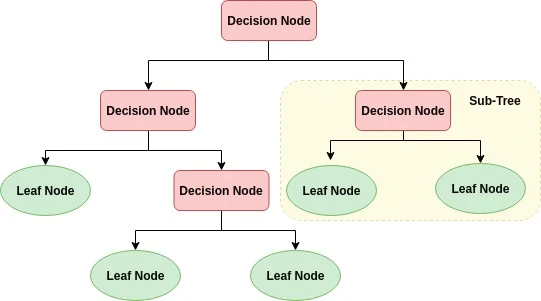

决策树是一种共享内部决策逻辑的白盒类型机器学习算法。它的时间复杂度是给定数据中记录数和属性数的函数，训练速度更快。

决策树是一种无分布或非参数的方法，不依赖于概率分布假设。可以很好地处理高维数据。

决策树算法的基本思想：

选择自变量和因变量

选择训练数据集和测试数据集。

以相关自变量属性做为决策树的root节点，通过分类来划分数据集。

在每个子节点递归重复此过程来开始构建树，直到和预测目标属性匹配：

    所有数据都属于相同的属性。
    
    没有剩余可以分类的属性了。
    
    没有更多的实例可供操作了
    
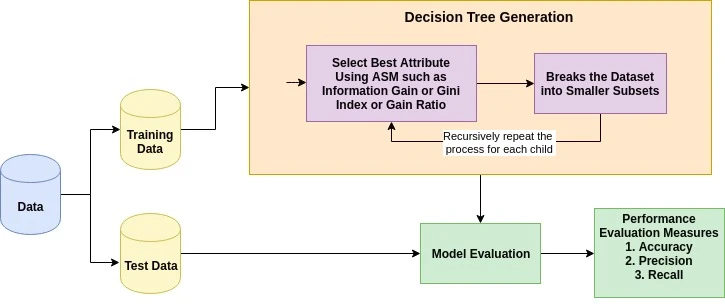

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

In [2]:
# 数据源地址
train_url = 'adult.data'
test_url = 'adult.test'

In [3]:
# 数据没有列名，需要设置列名称
attributes =  ["age", "workclass", "fnlwgt", "education", "educationNum", "maritalStatus",
        "occupation", "relationship", "race", "sex", "capitalGain", "capitalLoss",
        "hoursPerWeek", "nativeCountry", "salary"] 
# 在读取时设置列名
original_train = pd.read_csv(train_url, engine='python', names=attributes, na_values="?")
# 在读取时跳过第1行
original_test = pd.read_csv(test_url, engine='python', skiprows=1, names=attributes, na_values="?")

In [10]:
# 训练特征
feature_cols = ["age", "workclass", "fnlwgt", "education", "educationNum", "maritalStatus",
        "occupation", "relationship", "race", "sex", "capitalGain", "capitalLoss",
        "hoursPerWeek", "nativeCountry"] 
train_feature = original_train[feature_cols]
tratn_target = original_train.salary

In [11]:
feature_train, feature_test, target_train, target_test = train_test_split(train_feature, tratn_target, test_size=0, random_state=1)

In [12]:
# 创建决策树分类器
clf = DecisionTreeClassifier()

In [40]:
# 编码训练数据集特征值
le_train_feature = preprocessing.LabelEncoder()
feature_train_coded = feature_train.apply(le_train_feature.fit_transform)
# 编码训练数据集目标值
le_train_target = preprocessing.LabelEncoder()
le_train_target.fit(target_train)
target_train_coded = le_train_target.transform(target_train)

In [41]:
print(target_train_coded)

[0 0 1 ... 0 0 1]


In [42]:
# 训练决策树分类器

clf = clf.fit(feature_train_coded,target_train_coded)


In [60]:
test_feature, test_feature_none, test_target, test_target_none = train_test_split(original_test[feature_cols], original_test.salary, test_size=0, random_state=1)

In [62]:
# 编码测试数据集特征值
le_test_feature = preprocessing.LabelEncoder()
test_feature_coded = test_feature.apply(le_test_feature.fit_transform)

# 编码测试数据集目标值
le_test_target = preprocessing.LabelEncoder()
le_test_target.fit(test_target)
test_target_coded = le_test_target.transform(test_target)

In [63]:
# 预测测试数据集的响应
target_predict = clf.predict(test_feature_coded)

In [79]:
print("Accuracy:",metrics.accuracy_score(test_target_coded, target_predict))

Accuracy: 0.8019163442049014
